# Exploratory Data Analysis of Visits.csv

## 1) Loading the libraries and the dataset

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici
from dython.nominal import associations

In [181]:
# read the data
visits = pd.read_csv('Cleaned_Data/visits.csv')

## 2) Prepare the data

In [182]:
# convert start_timestamp and end_timestamp to datetime
visits['start_timestamp'] = pd.to_datetime(visits['start_timestamp'])
visits['end_timestamp'] = pd.to_datetime(visits['end_timestamp'])

# print the oldest and the newest date
print('Oldest date:', visits['start_timestamp'].min())
print('Newest date:', visits['start_timestamp'].max())


Oldest date: 2020-06-25 01:00:00
Newest date: 2024-01-30 23:00:00


In [183]:
# check duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [184]:
# print the null values
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
dtype: int64


In [185]:
 # dtypes
visits.dtypes

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
dtype: object

### 2.1) Merge the datasets

Given the limited amount of info that the "users.csv" have, we can add them to the visits.csv dataset

In [186]:
# load users
users = pd.read_csv('Cleaned_Data/users.csv')

In [187]:
# merge the data on customer_id
visits = pd.merge(visits, users, on='customer_id', how='left')

In [188]:
visits.head()

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time,user_first_name,user_last_name,gender,email,email_domain
0,7f94232d-9cca-4893-aebe-9a267a752f87,de5323eb-5e01-481f-b73a-bb78af953894,2023-04-18 10:51:24.477465,2023-04-18 11:46:26.893492,car configuration,NaN,0 days 00:55:02.416027,Michele,Beasley,Female,michele.beasley1988@gmail.com,gmail.com
1,dcb32330-15b0-4fd1-b376-9b9335fee7f9,15dcef30-b549-447b-8809-229c9de8526b,2021-03-03 17:54:25.117599,2021-03-03 18:07:25.117599,viewing,NaN,0 days 00:13:00,Taylor,Becker,Female,taylor@hotmail.com,hotmail.com
2,8b02d675-1365-45bc-af64-61ef9e79149c,3b656455-1690-47d9-b7ad-9e0aaa3bb229,2023-07-07 13:09:00.000000,2023-07-07 13:19:00.000000,purchasing,d1bfe5f5-edc1-4148-8eb0-8127dd3b52c1,0 days 00:10:00,Kathryn,Melton,Female,kathryn.melton@gmail.com,gmail.com
3,bdfc7048-adc5-4da7-a37a-4f9d90cf6436,c583c671-2f8a-47f3-9460-bd444b1811c8,2023-09-14 11:25:12.820271,2023-09-14 12:20:15.523626,car configuration,NaN,0 days 00:55:02.703355,Tamara,NaN,Female,mendez@gmail.com,gmail.com
4,2ad3a1e1-0b9c-417f-95f7-70607b0fe96e,da8268d8-4e81-4538-bf1d-836ac4d5b155,2020-12-04 19:15:41.833927,2020-12-04 19:27:41.833927,car configuration,NaN,0 days 00:12:00,Kimberly,Davis,Female,kimberly.davis@gmail.com,gmail.com


In [189]:
# checks the null values
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
dtype: int64


In [190]:
# checks the duplicates
print('Duplicates:', visits.duplicated().sum())

Duplicates: 0


In [191]:
# checks the dtypes
visits.dtypes

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
user_first_name                object
user_last_name                 object
gender                         object
email                          object
email_domain                   object
dtype: object

In [192]:
# change the dtype of visit_duration_time in seconds
visits['visit_duration_time'] = pd.to_timedelta(visits['visit_duration_time']).dt.total_seconds()

In [193]:
# add a boolean based on the presence of a purchase "transaction_id"
visits['purchase'] = visits['transaction_id'].notnull()

In [194]:
# merge the data on purchase_id
sales = pd.read_csv('Modified_Data/sales.csv')

# keep only the columns needed
sales = sales[['transaction_id', 'platform', 'purchase_date',
       'purchase_price', 'user_review', 'car_model', 'fuel_type',
       'release_date', 'price', 'discount', 'car_age_days']]


visits = pd.merge(visits, sales, on='transaction_id', how='left')

visit_id                       object
customer_id                    object
start_timestamp        datetime64[ns]
end_timestamp          datetime64[ns]
visit_type                     object
transaction_id                 object
visit_duration_time            object
user_first_name                object
user_last_name                 object
gender                         object
email                          object

In [195]:
sales.columns

Index(['transaction_id', 'platform', 'purchase_date', 'purchase_price',
       'user_review', 'car_model', 'fuel_type', 'release_date', 'price',
       'discount', 'car_age_days'],
      dtype='object')

In [196]:
visits.head()

,visit_id,customer_id,start_timestamp,end_timestamp,visit_type,transaction_id,visit_duration_time,user_first_name,user_last_name,gender,...,platform,purchase_date,purchase_price,user_review,car_model,fuel_type,release_date,price,discount,car_age_days
0,7f94232d-9cca-4893-aebe-9a267a752f87,de5323eb-5e01-481f-b73a-bb78af953894,2023-04-18 10:51:24.477465,2023-04-18 11:46:26.893492,car configuration,NaN,3302.416027,Michele,Beasley,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,dcb32330-15b0-4fd1-b376-9b9335fee7f9,15dcef30-b549-447b-8809-229c9de8526b,2021-03-03 17:54:25.117599,2021-03-03 18:07:25.117599,viewing,NaN,780.000000,Taylor,Becker,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8b02d675-1365-45bc-af64-61ef9e79149c,3b656455-1690-47d9-b7ad-9e0aaa3bb229,2023-07-07 13:09:00.000000,2023-07-07 13:19:00.000000,purchasing,d1bfe5f5-edc1-4148-8eb0-8127dd3b52c1,600.000000,Kathryn,Melton,Female,...,Dealership,2023-07-07,30000.0,3.0,1 Series,Diesel,2010-10-01,30000.0,0.0,4662.0
3,bdfc7048-adc5-4da7-a37a-4f9d90cf6436,c583c671-2f8a-47f3-9460-bd444b1811c8,2023-09-14 11:25:12.820271,2023-09-14 12:20:15.523626,car configuration,NaN,3302.703355,Tamara,NaN,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2ad3a1e1-0b9c-417f-95f7-70607b0fe96e,da8268d8-4e81-4538-bf1d-836ac4d5b155,2020-12-04 19:15:41.833927,2020-12-04 19:27:41.833927,car configuration,NaN,720.000000,Kimberly,Davis,Female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2) Feature engineering

In [197]:
# calculate the average visit time back to the original dataframe
visits['average_visit_time'] = visits['customer_id'].map(visits.groupby('customer_id')['visit_duration_time'].mean())

In [198]:
# add for every customer the visit number based on the start_timestamp
visits['visit_number'] = visits.groupby('customer_id')['start_timestamp'].rank(method='first', ascending=True)

In [199]:
# impute the platform, group by the user_id if the start_timestamp is in the same week
visits['platform'] = visits['platform'].fillna(visits.groupby('customer_id')['platform'].transform('first'))

# with the same logic impute the purchase_date, purchase_price, user_review, car_model, fuel_type, release_date, price, discount, car_age_days
visits['purchase_date'] = visits['purchase_date'].fillna(visits.groupby('customer_id')['purchase_date'].transform('first'))
visits['purchase_price'] = visits['purchase_price'].fillna(visits.groupby('customer_id')['purchase_price'].transform('first'))
visits['user_review'] = visits['user_review'].fillna(visits.groupby('customer_id')['user_review'].transform('first'))
visits['car_model'] = visits['car_model'].fillna(visits.groupby('customer_id')['car_model'].transform('first'))
visits['fuel_type'] = visits['fuel_type'].fillna(visits.groupby('customer_id')['fuel_type'].transform('first'))
visits['price'] = visits['price'].fillna(visits.groupby('customer_id')['price'].transform('first'))
visits['discount'] = visits['discount'].fillna(visits.groupby('customer_id')['discount'].transform('first'))
visits['car_age_days'] = visits['car_age_days'].fillna(visits.groupby('customer_id')['car_age_days'].transform('first'))

We can make this assumption because only two users bought a car twice. Therefore, we assume that users who made a purchase visited the same platform before buying and for the same car.

In [200]:
visits.isna().sum()

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
purchase                    0
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
average_visit_time          0
visit_number                0
dtype: int64

### 2.2) Associations

In [201]:
visits_dython = visits.copy()

# create a column for only the "Dealership" category in the platform column
visits_dython['Dealership'] = visits_dython['platform'] == 'Dealership'

# print all the column that have id in the name
id_columns = [col for col in visits_dython.columns if '_id' in col]
print("We are dropping the following columns:", id_columns)
visits_dython.drop(columns=id_columns, inplace=True)

We are dropping the following columns: ['visit_id', 'customer_id', 'transaction_id']


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\dython\nominal.py:632: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  lambda col: col.view(np.int64), axis=0


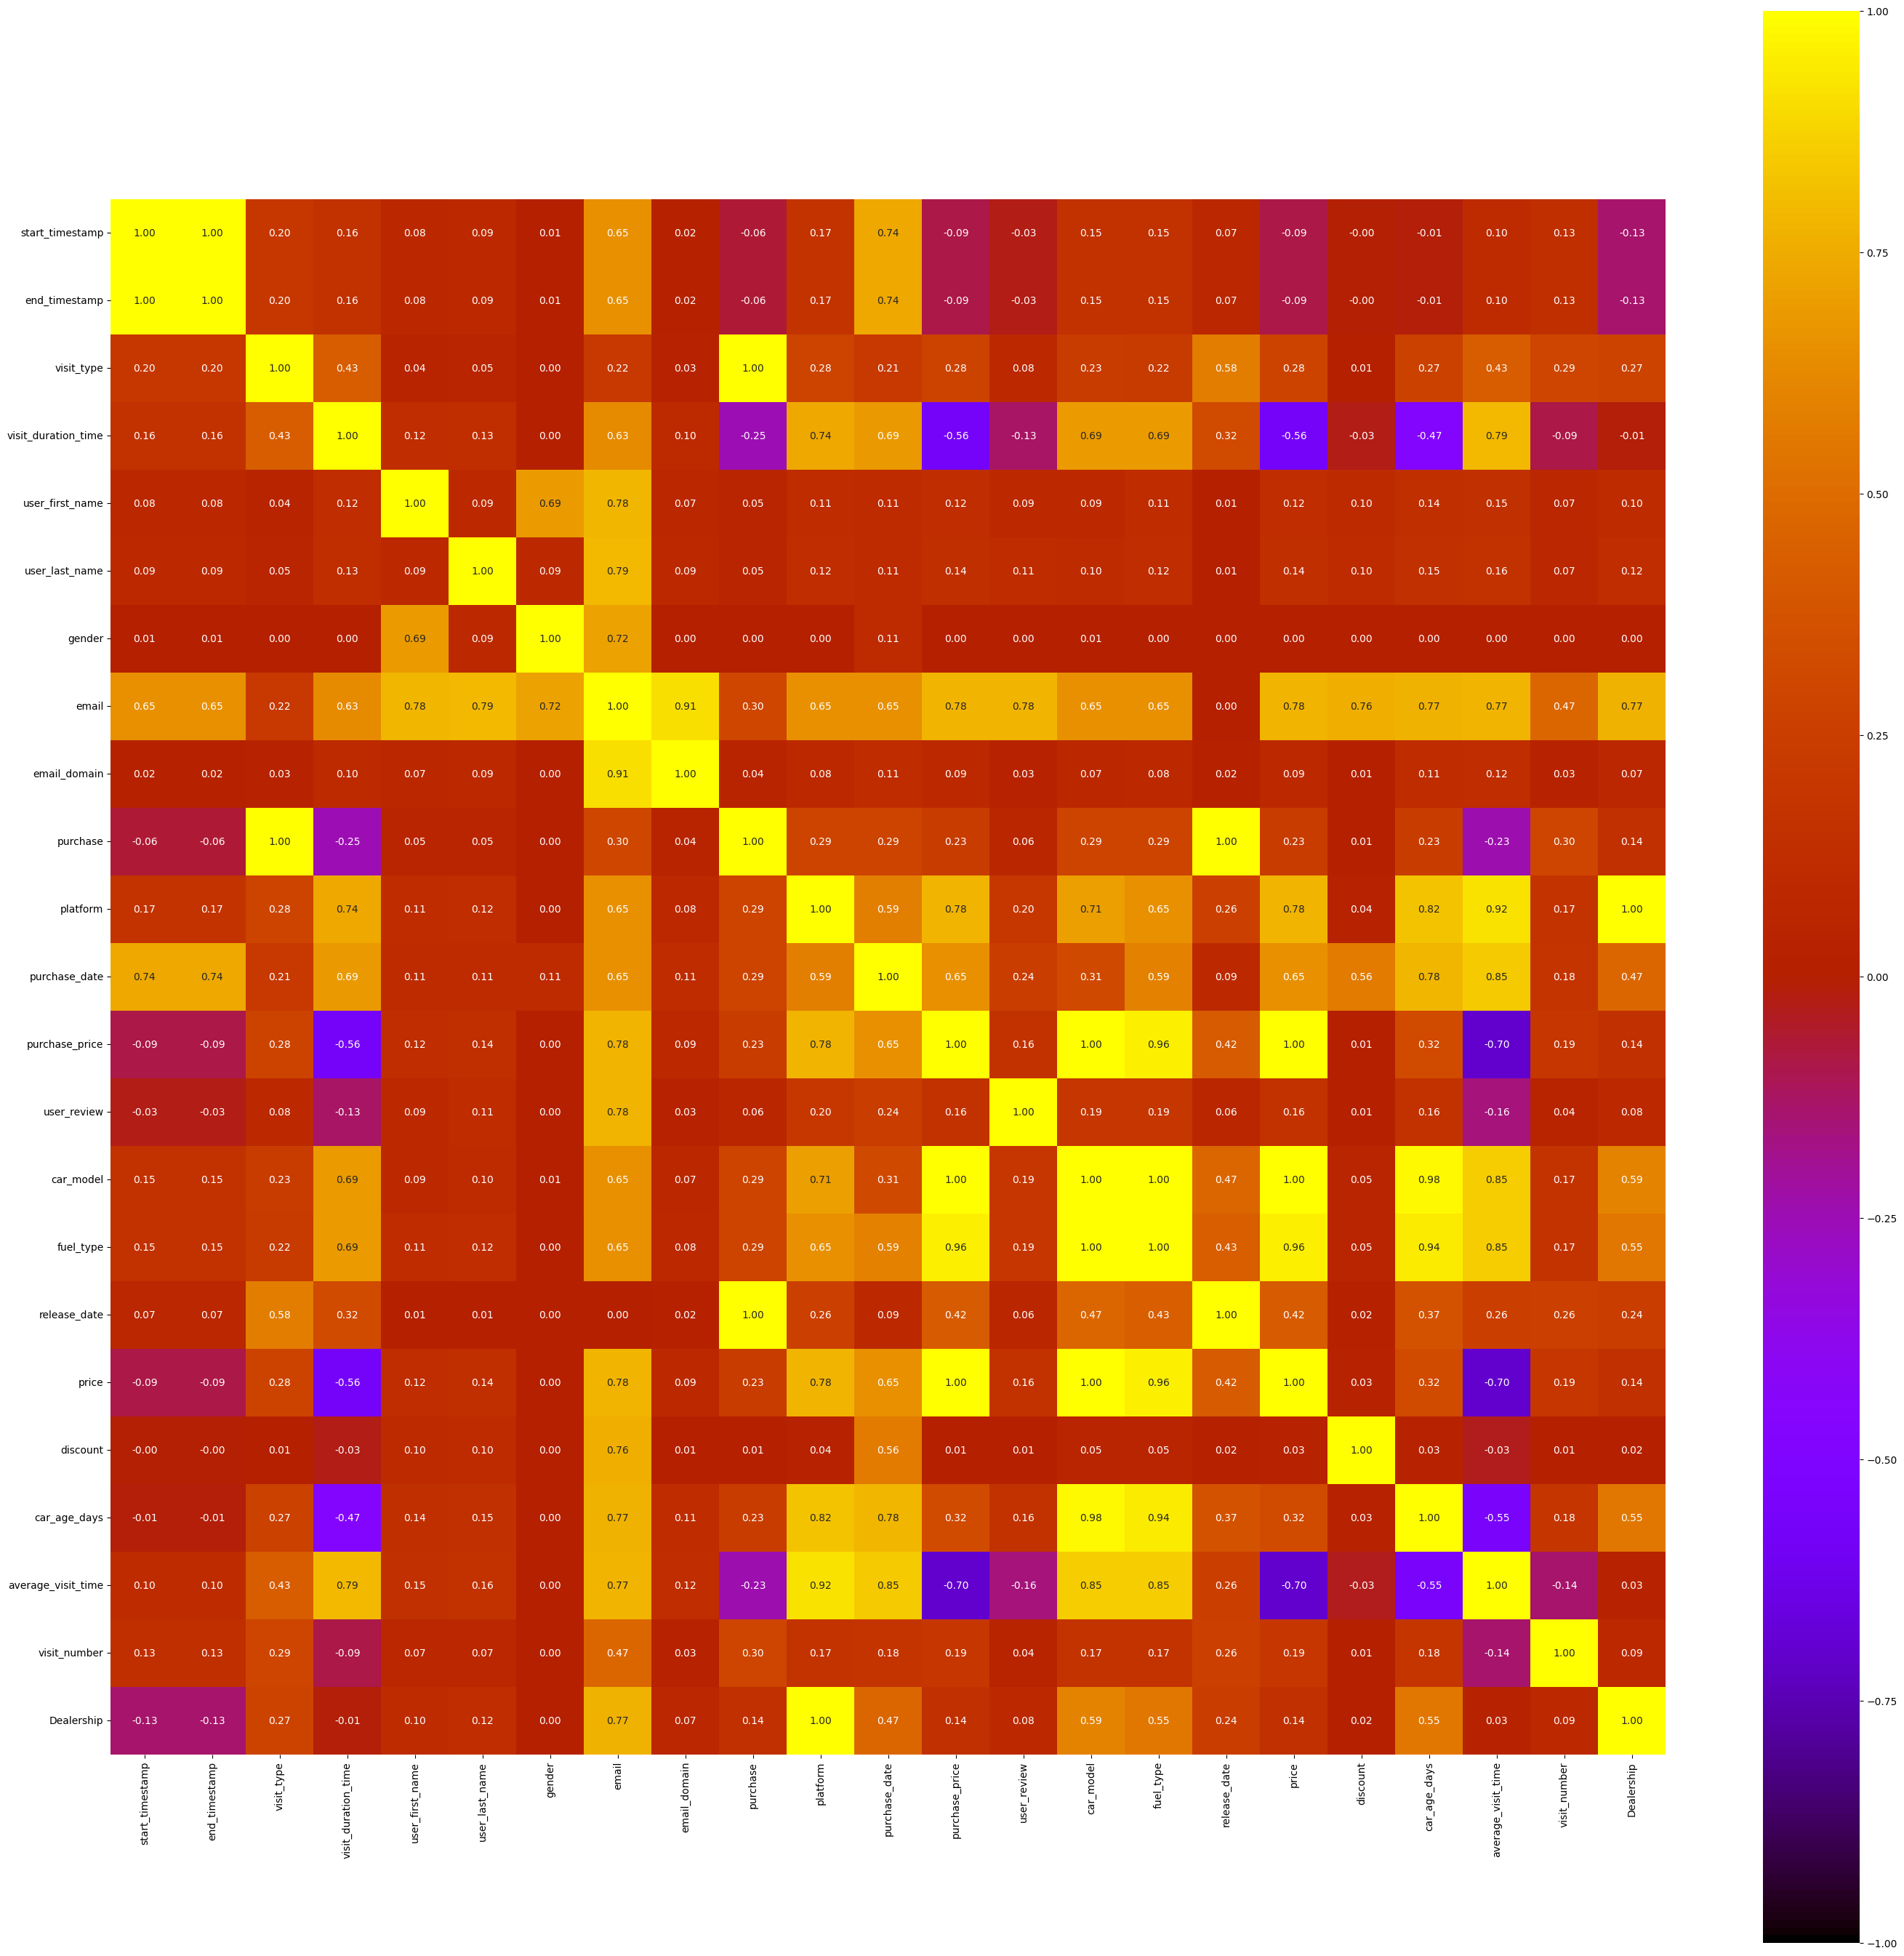

In [202]:
associations_visits = associations(visits_dython, multiprocessing=True, cmap='gnuplot', num_num_assoc='spearman')

Seems that the Dealership has a strong correlation wit a lot of different features, the ones that we were expecting are: the purchase bool, the platform type and the user review

The associations that we weren't expecting are: the price and the visit duration time

It's interesting to see how the purchase and visit type have the same association


## 3) Analyse all columns one by one

### id columns

In [203]:
# check any strange values in the visit_id column
visits[~visits['visit_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["visit_id"].value_counts()

Series([], Name: count, dtype: int64)

In [204]:
# check any strange values in the customer_id column
visits[~visits['customer_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["customer_id"].value_counts()

Series([], Name: count, dtype: int64)

In [205]:
# check any strange values in the customer_id column
visits[~visits['transaction_id'].fillna('').str.contains(r'[a-z0-9]{8}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{4}-[a-z0-9]{12}')]["transaction_id"].value_counts()

Series([], Name: count, dtype: int64)

In [206]:
# check duplicates on visit_id
print('Duplicates:', visits['visit_id'].duplicated().sum())

Duplicates: 0


In [207]:
# check duplicates on transaction_id where is not null
print('Duplicates:', visits[visits['transaction_id'].notnull()]['transaction_id'].duplicated().sum())

Duplicates: 0


In [208]:
# check duplicates on customer_id (we expect duplicates)
print('Duplicates:', visits['customer_id'].duplicated().sum())

Duplicates: 302411


In [209]:
# print the top 5 customers with the most visits
print(visits['customer_id'].value_counts().head())

customer_id
db1482ff-1a20-43c0-94c5-bcacba70d5ea    17
baf07990-e4c0-4b45-8d74-1dd054073fc2    15
40a8e90c-7b08-4958-9135-0d76684c922c    15
bd57c252-55a7-47c4-915f-572db31439cb    14
afb96be6-ce70-4286-9f13-2173884c49b1    13
Name: count, dtype: int64


### Start timestamp column

In [210]:
# check the first and the last start timestamp
print('Oldest date:', visits['start_timestamp'].min())
print('Newest date:', visits['start_timestamp'].max())

Oldest date: 2020-06-25 01:00:00
Newest date: 2024-01-30 23:00:00


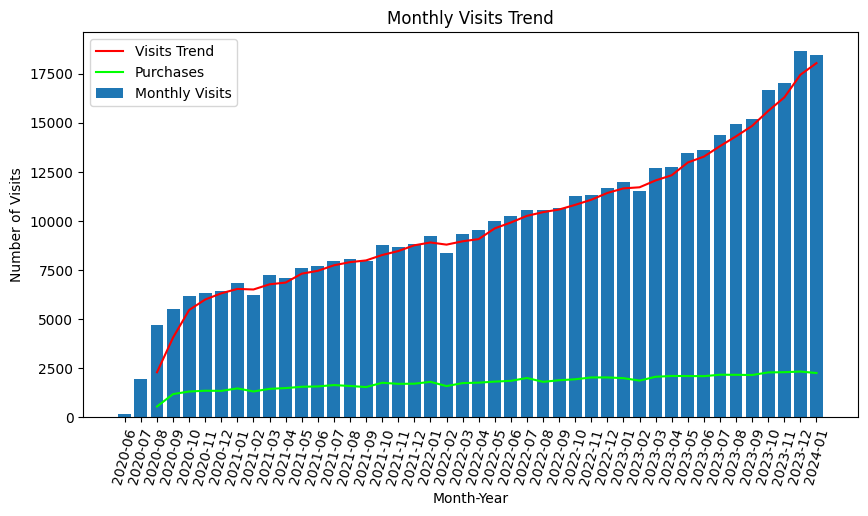

In [211]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the bar chart
monthly_visits = visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Monthly Visits')

# plot the line chart
ax.plot(monthly_visits.index.astype(str), monthly_visits.rolling(window=3).mean().values, color='red', label='Visits Trend')

# adding the purchase line
monthly_purchases = visits[visits['purchase']]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.plot(monthly_purchases.index.astype(str), monthly_purchases.values, color='lime', label='Purchases')

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Monthly Visits Trend')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show the plot
plt.show()

Really interesting, the trend is exatly what we want

The number of purchases needs more investigation

### End timestamp column

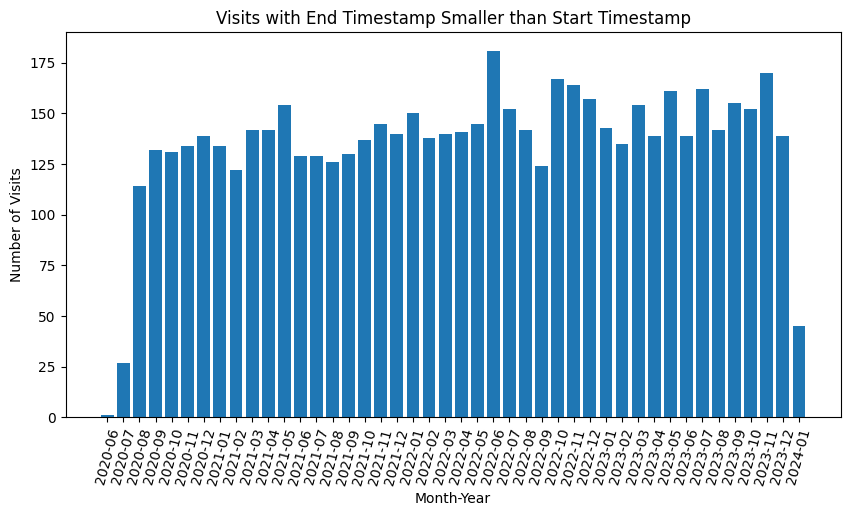

In [212]:
# plot when the end_timestamp is smaller than the start_timestamp
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
ax.bar(x =      visits[visits['end_timestamp'] < visits['start_timestamp']].groupby(visits['start_timestamp'].dt.to_period('M')).size().index.astype(str), 
       height = visits[visits['end_timestamp'] < visits['start_timestamp']].groupby(visits['start_timestamp'].dt.to_period('M')).size().values)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Visits with End Timestamp Smaller than Start Timestamp')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show the plot
plt.show()

It seems fine, from now on we're going to base our analysis on the start datetime

### Visit duration seconds

##### Number of Customers per Month by Platform

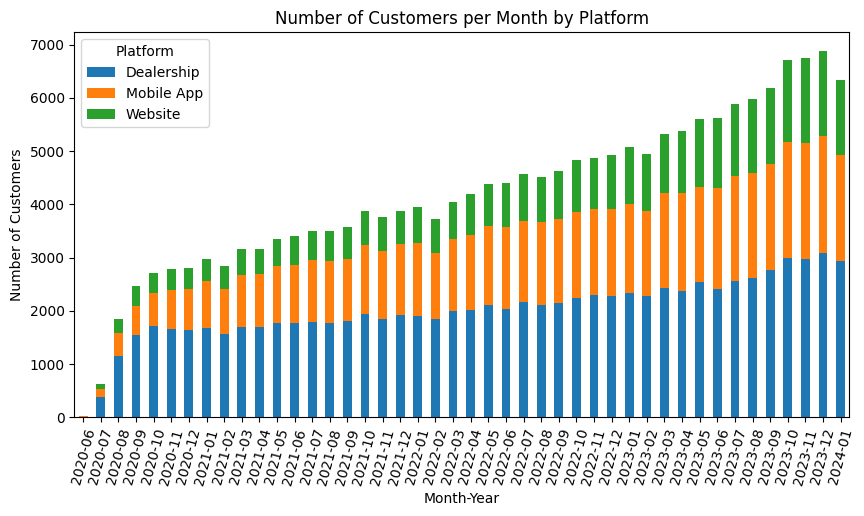

In [213]:
# create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# plot the bar chart
customers_per_month.plot(kind='bar', stacked=True, ax=ax)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers per Month by Platform')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend(title='Platform')

# show the plot
plt.show()

##### Monthly Average Visit Duration

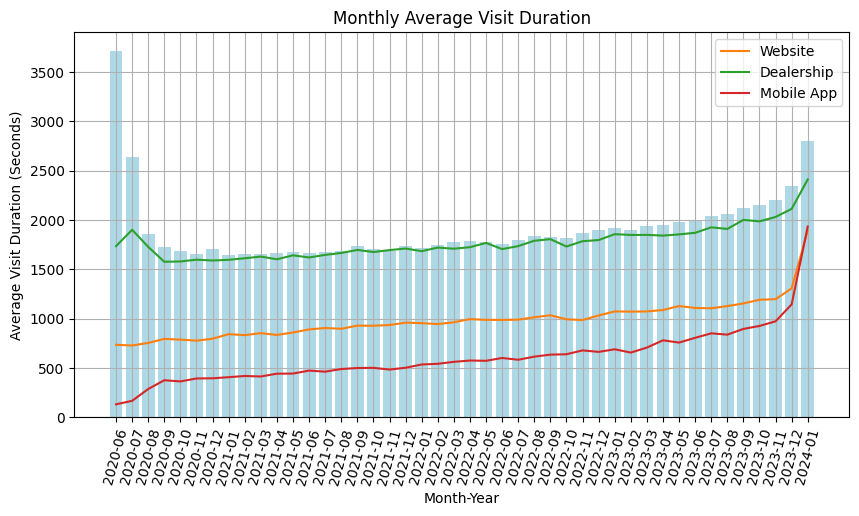

In [214]:
# plot the visit_duration_time distribution by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_duration = visits.groupby(visits['start_timestamp'].dt.to_period('M'))['visit_duration_time'].mean()
ax.bar(monthly_duration.index.astype(str), monthly_duration.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_duration = visits[visits['platform'] == platform].groupby(visits['start_timestamp'].dt.to_period('M'))['visit_duration_time'].mean()
    ax.plot(monthly_duration.index.astype(str), monthly_duration.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Average Visit Duration (Seconds)')
ax.set_title('Monthly Average Visit Duration')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show a grid
plt.grid(True)

# show the plot
plt.show()

It can be observed that in June 2020, the average visit duration was unusually high. <br>From November 2020 (the historical minimum), the trend reversed, and January 2024 is the month with the highest average duration. <br>The trend suggests that something happened recently that significantly increased the average visit duration.

In [215]:
# check the null values
visits.isnull().sum()

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
purchase                    0
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
average_visit_time          0
visit_number                0
dtype: int64

In [216]:
# number of nans
print(visits.isnull().sum())

visit_id                    0
customer_id                 0
start_timestamp             0
end_timestamp               0
visit_type                  0
transaction_id         363807
visit_duration_time         0
user_first_name          3810
user_last_name           3802
gender                      0
email                    3787
email_domain             3787
purchase                    0
platform               125546
purchase_date          125546
purchase_price         125546
user_review            398264
car_model              125546
fuel_type              125546
release_date           363807
price                  125546
discount               125546
car_age_days           125546
average_visit_time          0
visit_number                0
dtype: int64


### Visit type column

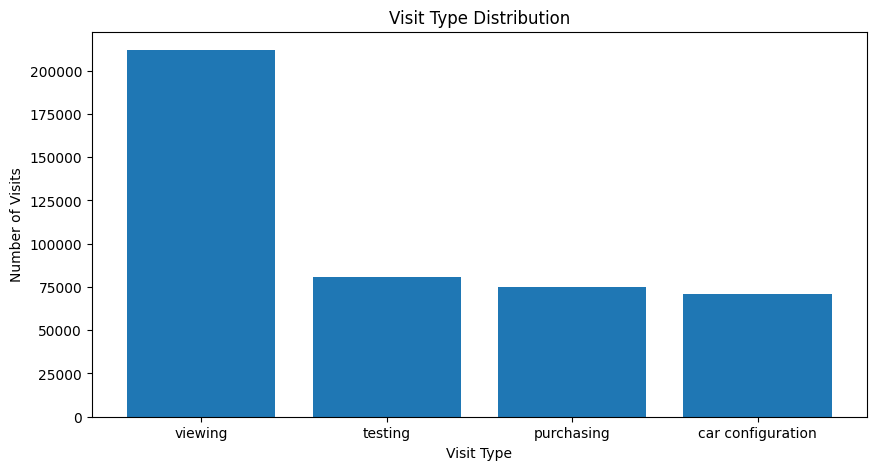

In [217]:
# plot the distribution of the visit_type
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
visit_type = visits['visit_type'].value_counts()
ax.bar(visit_type.index, visit_type.values)

# set the labels and title
ax.set_xlabel('Visit Type')
ax.set_ylabel('Number of Visits')
ax.set_title('Visit Type Distribution')

# show the plot
plt.show()

We can see that there's a lot of users that visit the website

Strangely the number of purchasing is bigger than the car configuration one, that's really strange

#### Monthly Visits by Visit Type

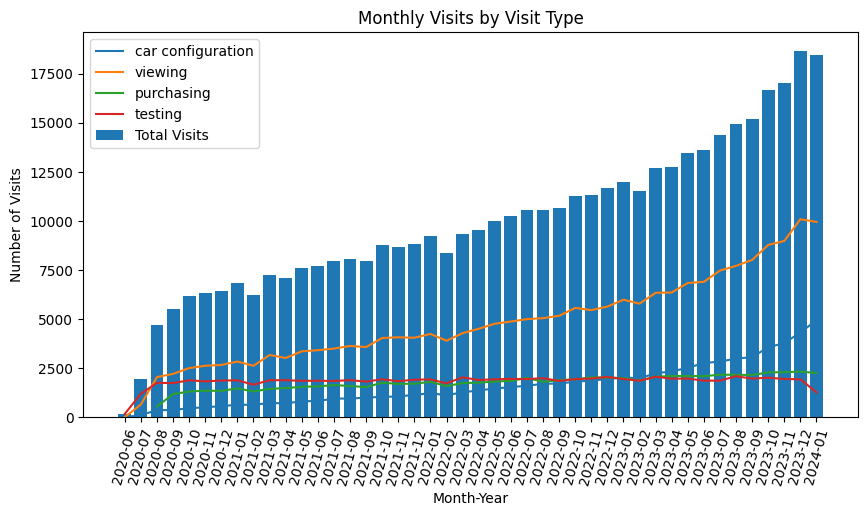

In [218]:
# plot the number of visit_type by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram of total visits
monthly_visits = visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Total Visits')

# plot a line for every visit_type
for visit_type in visits['visit_type'].unique():
    monthly_visits = visits[visits['visit_type'] == visit_type]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
    ax.plot(monthly_visits.index.astype(str), monthly_visits.values, label=visit_type)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Visits')
ax.set_title('Monthly Visits by Visit Type')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# add a legend
ax.legend()

# show the plot
plt.show()

#### Monthly Visits by Visit Type (in details)

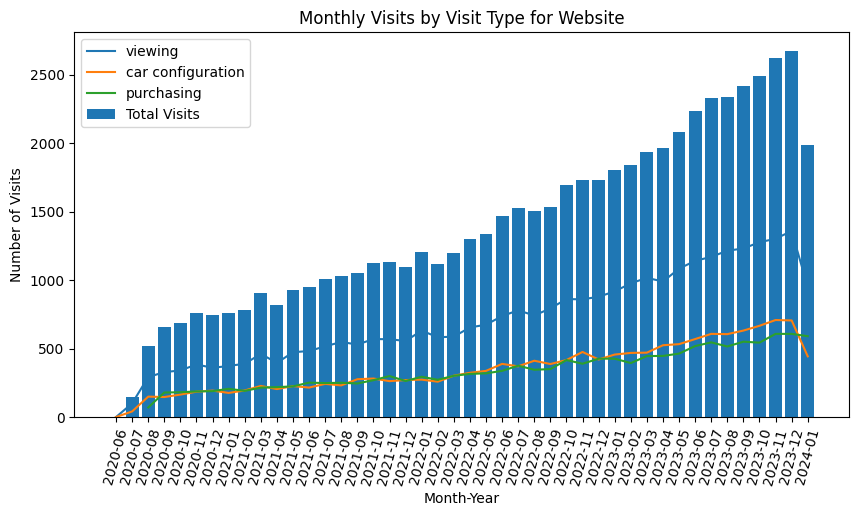

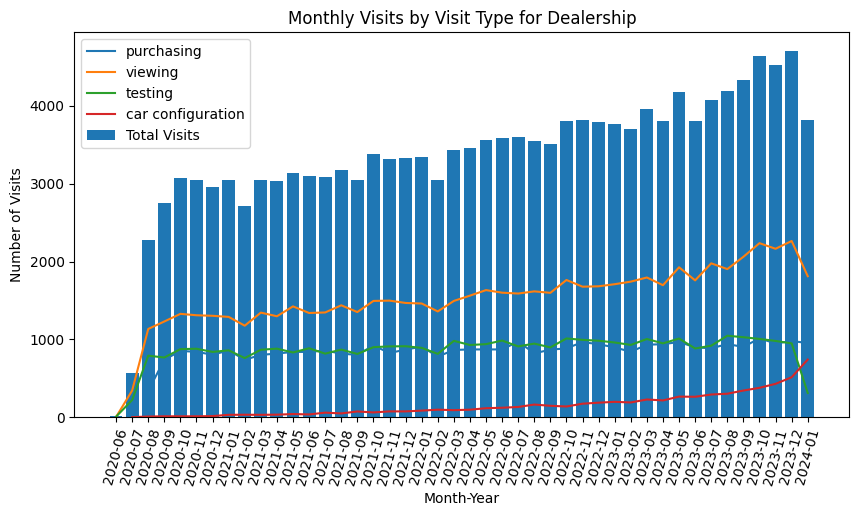

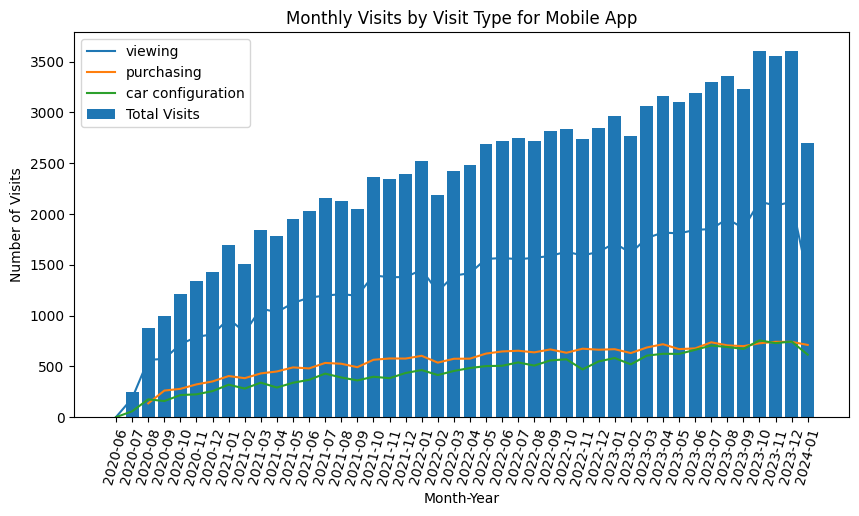

In [219]:
platforms = visits['platform'].unique()

for platform in platforms:
    # check if it's not nan
    if pd.notnull(platform):
        fig, ax = plt.subplots(figsize=(10, 5))

        # filter visits by platform
        platform_visits = visits[visits['platform'] == platform]

        # plot the histogram of total visits
        monthly_visits = platform_visits['start_timestamp'].dt.to_period('M').value_counts().sort_index()
        ax.bar(monthly_visits.index.astype(str), monthly_visits.values, label='Total Visits')

        # plot a line for every visit_type
        for visit_type in platform_visits['visit_type'].unique():
            monthly_visits = platform_visits[platform_visits['visit_type'] == visit_type]['start_timestamp'].dt.to_period('M').value_counts().sort_index()
            ax.plot(monthly_visits.index.astype(str), monthly_visits.values, label=visit_type)

        # set the labels and title
        ax.set_xlabel('Month-Year')
        ax.set_ylabel('Number of Visits')
        ax.set_title(f'Monthly Visits by Visit Type for {platform}')

        # rotate x-axis labels for better readability
        plt.xticks(rotation=75)

        # show the grid

        # add a legend
        ax.legend()

        # show the plot
    plt.show()

The dealership's monthly visits did not lose any growth with the introduction of the Website and the Mobile App. <br>This indicates that the dealership platform maintained its user base and continued to attract visits despite the availability of other platforms. <br>The consistent growth across all platforms suggests a robust and expanding customer engagement strategy.

### Customer analisys

In [220]:
# check if there's any unique value for the customer_id that doesn't repeat
print(f"There are {len(visits['customer_id'].value_counts()[visits['customer_id'].value_counts() == 1])} unique customers that visited only once.")
print(f"This represents {len(visits['customer_id'].value_counts()[visits['customer_id'].value_counts() == 1]) / len(visits['customer_id'].value_counts()) * 100:.2f}% of the total customers.")

There are 35482 unique customers that visited only once.
This represents 26.06% of the total customers.


In [221]:
# check how many users have a purchase
print(f"There are {len(visits[visits['purchase']]['customer_id'].unique())} users that have made a purchase.")
print(f"This represents {len(visits[visits['purchase']]['customer_id'].unique()) / len(visits['customer_id'].unique()) * 100:.2f}% of the total users.")

There are 74774 users that have made a purchase.
This represents 54.91% of the total users.


In [222]:
# Extract the date from the start_timestamp
visits['visit_date'] = visits['start_timestamp'].dt.date

# Group by customer_id and visit_date, and count the number of visits
visits_per_day = visits.groupby(['customer_id', 'visit_date']).size()

# Filter to get only the users who visited more than once on the same day
multiple_visits_per_day = visits_per_day[visits_per_day > 1]

# Print the result
print(f"There are {multiple_visits_per_day.shape[0]} instances of users visiting more than once on the same day.")

There are 5642 instances of users visiting more than once on the same day.


#### Avarage user review

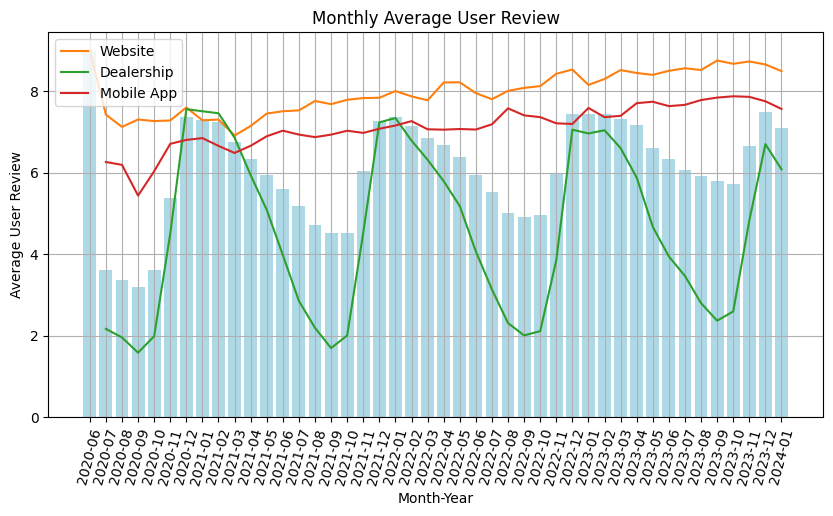

In [223]:
# plot the user_review group by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_review = visits.groupby(visits['start_timestamp'].dt.to_period('M'))['user_review'].mean()
ax.bar(monthly_review.index.astype(str), monthly_review.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_review = visits[visits['platform'] == platform].groupby(visits['start_timestamp'].dt.to_period('M'))['user_review'].mean()
    ax.plot(monthly_review.index.astype(str), monthly_review.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Average User Review')
ax.set_title('Monthly Average User Review')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show a grid
plt.grid(True)

# add a legend
ax.legend()

# show the plot
plt.show()

The avarage pattern here is really strange, but the trend is still positive

We can see that there's something strange arrount the Q3 (probably the website was in beta or something similar)

To investigate more the Dealership problem we can try with the correlation.

#### Monthly Purchases

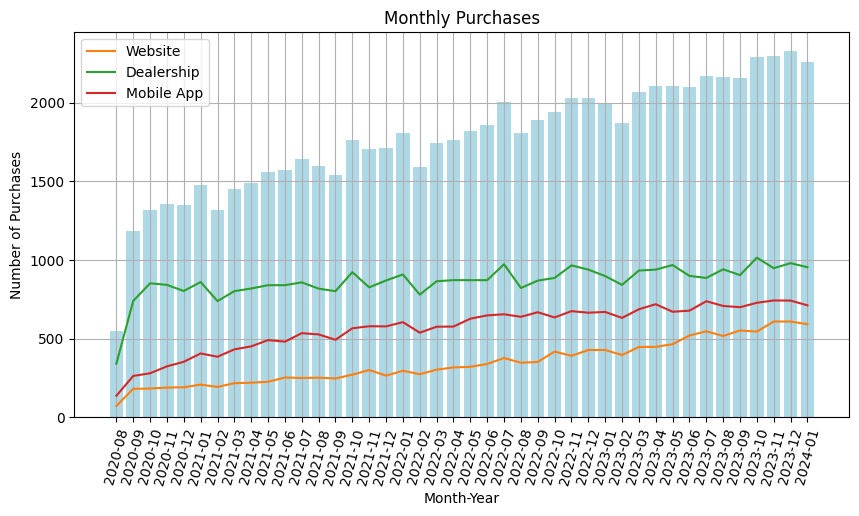

In [224]:
# plot the number of purchases by month and year
fig, ax = plt.subplots(figsize=(10, 5))

# plot the histogram
monthly_purchases = visits[visits['purchase']].groupby(visits['start_timestamp'].dt.to_period('M')).size()
ax.bar(monthly_purchases.index.astype(str), monthly_purchases.values, color='lightblue', alpha=1)

# plot a line for every platform
for platform in visits['platform'].unique():
    monthly_purchases = visits[(visits['platform'] == platform) & visits['purchase']].groupby(visits['start_timestamp'].dt.to_period('M')).size()
    ax.plot(monthly_purchases.index.astype(str), monthly_purchases.values, label=platform)

# set the labels and title
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of Purchases')
ax.set_title('Monthly Purchases')

# rotate x-axis labels for better readability
plt.xticks(rotation=75)

# show a grid
plt.grid(True)

# add a legend
ax.legend()

# show the plot
plt.show()